# Sentiment Analysis

In this notebook, we will do sentiment analysis with our data.

## Sentiment of Routine

We will use Textblob Module to do our analysis, and we will analyze the previously saved corpus data. We use corpus because order matters for sentiment analysis. Textblob will give a sentiment label in terms of polarity and subjectivity.

* __Polarity__ - How positive or negative a word or sentence is. -1 is very negative, +1 is very positive.
* __Subjectivity__ - How subjective / opinionated a word or sentence is. 0 is fact, +1 is very much an opinion

In [1]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali_wong,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony_jeselnik,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill_burr,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo_burnham,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave_chapelle,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan_minhaj,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim_jefferies,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe_rogan,[rock music playing] [audience cheering] [anno...,Joe Rogan
john_mulaney,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney
louis_ck,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [2]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data.transcript.apply(pol)
data['subjectivity'] = data.transcript.apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali_wong,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony_jeselnik,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.054285,0.559732
bill_burr,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo_burnham,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave_chapelle,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
hasan_minhaj,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim_jefferies,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe_rogan,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628
john_mulaney,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney,0.082355,0.484137
louis_ck,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


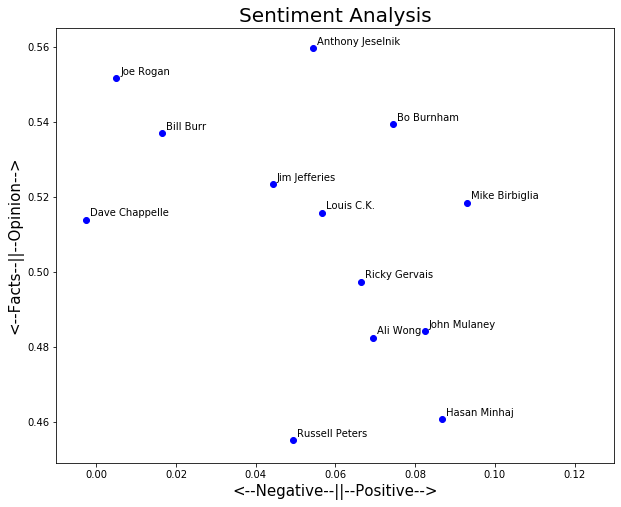

In [3]:
# Let's plot the results

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x,y, color='blue')
    plt.text(x+.001,y+.001, data.full_name.loc[comedian], fontsize=10)
    plt.xlim(-0.01,0.13)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<--Negative--||--Positive-->', fontsize=15)
plt.ylabel('<--Facts--||--Opinion-->', fontsize=15)

plt.show()

__Findings:__ 

* Russell Peters tends to be more positive and less opinionated
* Other comedians that have the same style: Ali Wong, Hasan Minhaj, Ricky Gervais.

## Sentiment of Routine Over Time

Now, instead of looking at the overall sentiment, we will check on the sentiment value over time for each routine.

In [4]:
# Split each routine into 10 parts

import numpy as np
import math

def split_text(text, n=10):
    '''Takes a string of text and splits into n equal parts, with n defaults to 10'''
    
    # Calculate the length of text
    length = len(text)
    size = math.floor(length/n)
    start = np.arange(0,length, size)
    
    # split the text and put the results in a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [12]:
list_pieces = []

for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

In [14]:
len(list_pieces)

13

In [15]:
len(list_pieces[0])

10

In [16]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

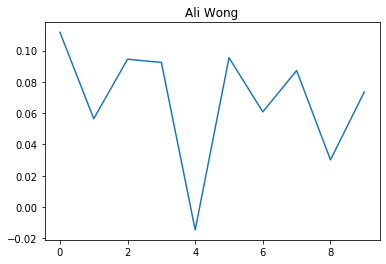

In [20]:
# try plotting for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].iloc[0])
plt.show()

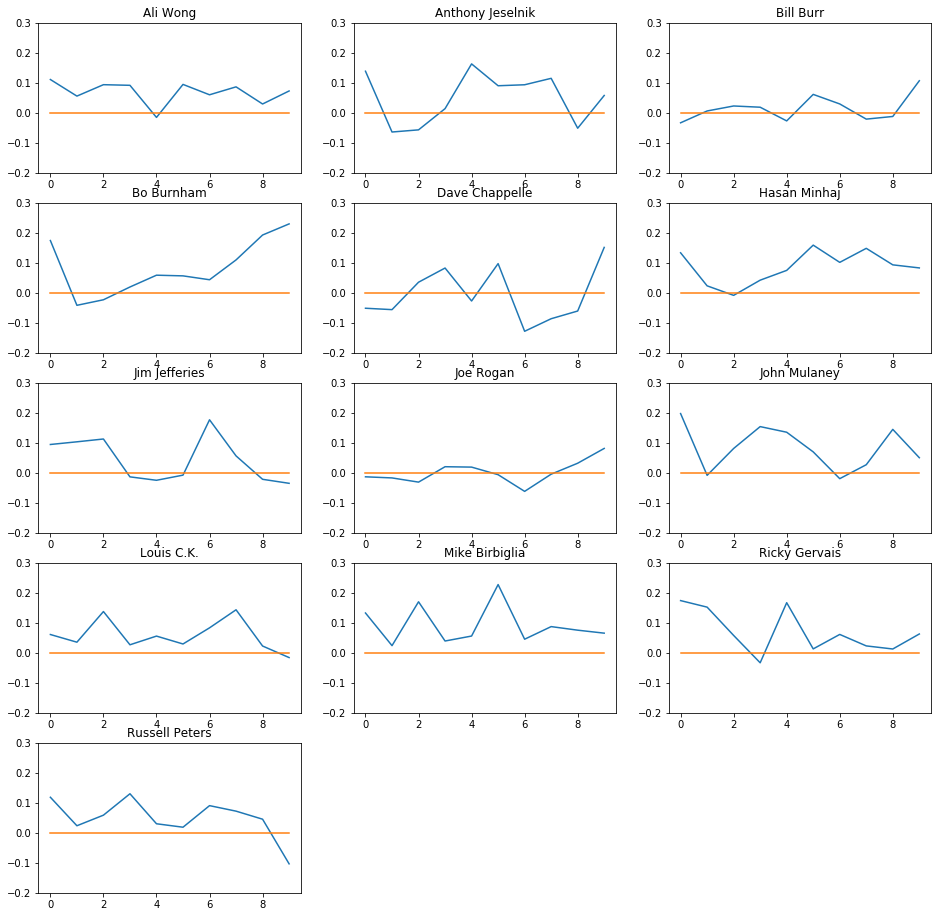

In [22]:
# now plotting for all comedians
plt.figure(figsize=(16,16))

for index, comedian in enumerate(data.index):
    plt.subplot(5,3,index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'].iloc[index])
    plt.ylim(ymin=-0.2, ymax=0.3)
    
plt.show()

__Findings:__ Russell seems to stay generally positive throughout his routine, similar comedians are Ali Wong and Louis C.K.

## Conclusion

Based on this simple sentiment analysis and the previous EDA, in general, the comedian Ali Wong has several similarity with Russell Peters. While there are other comedians that have closer similarity, their name only appear one time per our analysis topic.